 # 1. XOR

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential # 모델 객체 생성시
from tensorflow.keras.layers import Dense # layer 쌓을 때 필요한 함수
import matplotlib.pyplot as plt

In [2]:
# 1. data set
x_data = [[0,0], [0,1], [1,0], [1,1]]
y_data = [[0],   [1],   [1],   [0]]
# 2. 모델 구성
model = Sequential()
model.add(Dense(10, input_dim=2, activation="relu"))
model.add(Dense(20, activation="relu")) # 은닉층은 input_dim 쓰지 않음
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
# 입력2개, 출력 10 : Weight 20(10*2)개, bias 10개
print(model.summary()) # 파라미터의 갯수
# 3. 모델 학습과정
model.compile(loss="mse", optimizer="adam", metrics=['binary_accuracy'])
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# 4. 학습
fit_hist = model.fit(x_data, y_data, epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1/1 [==============================] - 1s 540ms/step - loss: 0.2351 - binary_accuracy: 0.7500
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2346 - binary_accuracy: 0.5000
Epoch 3/100
1/1 [========================

1/1 [==============================] - 0s 8ms/step - loss: 0.1836 - binary_accuracy: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1826 - binary_accuracy: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 6ms/step - loss: 0.1817 - binary_accuracy: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1807 - binary_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1797 - binary_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1787 - binary_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1776 - binary_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1766 - binary_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1756 - binary_accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 0s 3ms/step - lo

In [3]:
fit_hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

In [4]:
for acc in fit_hist.history['binary_accuracy']:
    print(acc, end="\t")

0.75	0.5	0.5	0.5	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	0.75	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	1.0	

In [5]:
for loss in fit_hist.history['loss']:
    print(loss, end="\t")

0.23514577746391296	0.23458042740821838	0.23397672176361084	0.23332726955413818	0.23266853392124176	0.23197685182094574	0.23128612339496613	0.23059949278831482	0.22989529371261597	0.22917746007442474	0.22845256328582764	0.22774064540863037	0.22702784836292267	0.2262982726097107	0.22556769847869873	0.22485113143920898	0.22414492070674896	0.2234363853931427	0.22272983193397522	0.22202427685260773	0.2213229089975357	0.22060471773147583	0.2198813110589981	0.2191614806652069	0.2184312641620636	0.2177109271287918	0.21703818440437317	0.2163490653038025	0.21565917134284973	0.21496590971946716	0.21430686116218567	0.21362030506134033	0.21293696761131287	0.2122693955898285	0.21157442033290863	0.21086634695529938	0.21019476652145386	0.20953777432441711	0.20885688066482544	0.20815426111221313	0.20744986832141876	0.2067360281944275	0.20600247383117676	0.2052725851535797	0.20454610884189606	0.20379085838794708	0.2030346691608429	0.2022772878408432	0.20150887966156006	0.20074979960918427	0.19996878504

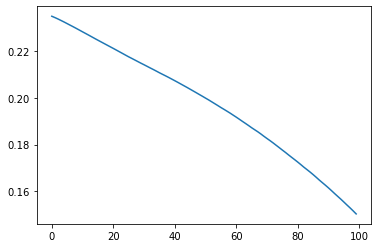

In [6]:
plt.plot(fit_hist.history['loss'])
plt.show()

In [8]:
# 입력 스타일은 " 0 0 "
while True:
    input_list = input("space로 분리해서 0이나 1을 2개 입력(종료:9)").strip().split()
    input_data = list(map(int, input_list))
    if input_data[0] == 9:
        break;
    input_data = np.array(input_data).reshape(1,2)
    print('입력값 :', input_data)
    print('예측값 :', int(model.predict(input_data).round()) )

space로 분리해서 0이나 1을 2개 입력(종료:9)0 0
입력값 : [[0 0]]
예측값 : 0
space로 분리해서 0이나 1을 2개 입력(종료:9)1 1
입력값 : [[1 1]]
예측값 : 0
space로 분리해서 0이나 1을 2개 입력(종료:9)1 0
입력값 : [[1 0]]
예측값 : 1
space로 분리해서 0이나 1을 2개 입력(종료:9)9


# 2. OR

In [9]:
# 1. data set
x_or_data = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_or_data = np.array([[0],[1],[1],[1]] , 'float32')
# 2. 모델 구성
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation="sigmoid"))
# 3. 모델 학습과정
model.compile(loss="mse", optimizer="adam", metrics=['binary_accuracy'])
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# 4. 학습
fit_hist = model.fit(x_or_data, y_or_data, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 418ms/step - loss: 0.2792 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2765 - binary_accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2739 - binary_accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2713 - binary_accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2686 - binary_accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2661 - binary_accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2635 - binary_accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2610 - binary_accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 976us/step - loss: 0.2585 - binary_accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.1508 - binary_accuracy: 0.7500
Epoch 79/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1500 - binary_accuracy: 0.7500
Epoch 80/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1492 - binary_accuracy: 0.7500
Epoch 81/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1484 - binary_accuracy: 0.7500
Epoch 82/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1477 - binary_accuracy: 0.7500
Epoch 83/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1469 - binary_accuracy: 0.7500
Epoch 84/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1462 - binary_accuracy: 0.7500
Epoch 85/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1455 - binary_accuracy: 0.7500
Epoch 86/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1448 - binary_accuracy: 0.7500
Epoch 87/1000
1/1 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 3ms/step - loss: 0.1140 - binary_accuracy: 0.7500
Epoch 155/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1137 - binary_accuracy: 0.7500
Epoch 156/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1134 - binary_accuracy: 0.7500
Epoch 157/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1131 - binary_accuracy: 0.7500
Epoch 158/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1127 - binary_accuracy: 0.7500
Epoch 159/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1124 - binary_accuracy: 0.7500
Epoch 160/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1121 - binary_accuracy: 0.7500
Epoch 161/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1118 - binary_accuracy: 0.7500
Epoch 162/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1114 - binary_accuracy: 0.7500
Epoch 163/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.0916 - binary_accuracy: 0.7500
Epoch 231/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0913 - binary_accuracy: 0.7500
Epoch 232/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0911 - binary_accuracy: 0.7500
Epoch 233/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0908 - binary_accuracy: 0.7500
Epoch 234/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0906 - binary_accuracy: 0.7500
Epoch 235/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0903 - binary_accuracy: 0.7500
Epoch 236/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0901 - binary_accuracy: 0.7500
Epoch 237/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0898 - binary_accuracy: 0.7500
Epoch 238/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0896 - binary_accuracy: 0.7500
Epoch 239/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0755 - binary_accuracy: 1.0000
Epoch 307/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0754 - binary_accuracy: 1.0000
Epoch 308/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0752 - binary_accuracy: 1.0000
Epoch 309/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0751 - binary_accuracy: 1.0000
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0749 - binary_accuracy: 1.0000
Epoch 311/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0748 - binary_accuracy: 1.0000
Epoch 312/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0747 - binary_accuracy: 1.0000
Epoch 313/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0745 - binary_accuracy: 1.0000
Epoch 314/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0744 - binary_accuracy: 1.0000
Epoch 315/1000
1/1 [==============================] 

1/1 [==============================] - 0s 6ms/step - loss: 0.0661 - binary_accuracy: 1.0000
Epoch 383/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0660 - binary_accuracy: 1.0000
Epoch 384/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0659 - binary_accuracy: 1.0000
Epoch 385/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0658 - binary_accuracy: 1.0000
Epoch 386/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0657 - binary_accuracy: 1.0000
Epoch 387/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0656 - binary_accuracy: 1.0000
Epoch 388/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0655 - binary_accuracy: 1.0000
Epoch 389/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0654 - binary_accuracy: 1.0000
Epoch 390/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0653 - binary_accuracy: 1.0000
Epoch 391/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.0587 - binary_accuracy: 1.0000
Epoch 459/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0586 - binary_accuracy: 1.0000
Epoch 460/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0585 - binary_accuracy: 1.0000
Epoch 461/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0584 - binary_accuracy: 1.0000
Epoch 462/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0583 - binary_accuracy: 1.0000
Epoch 463/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0582 - binary_accuracy: 1.0000
Epoch 464/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0582 - binary_accuracy: 1.0000
Epoch 465/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0581 - binary_accuracy: 1.0000
Epoch 466/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0580 - binary_accuracy: 1.0000
Epoch 467/1000
1/1 [==============================] 

1/1 [==============================] - 0s 15ms/step - loss: 0.0526 - binary_accuracy: 1.0000
Epoch 535/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.0525 - binary_accuracy: 1.0000
Epoch 536/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0524 - binary_accuracy: 1.0000
Epoch 537/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0524 - binary_accuracy: 1.0000
Epoch 538/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0523 - binary_accuracy: 1.0000
Epoch 539/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0522 - binary_accuracy: 1.0000
Epoch 540/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - binary_accuracy: 1.0000
Epoch 541/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0521 - binary_accuracy: 1.0000
Epoch 542/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0520 - binary_accuracy: 1.0000
Epoch 543/1000
1/1 [==============================]

1/1 [==============================] - 0s 3ms/step - loss: 0.0475 - binary_accuracy: 1.0000
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0474 - binary_accuracy: 1.0000
Epoch 612/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0474 - binary_accuracy: 1.0000
Epoch 613/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0473 - binary_accuracy: 1.0000
Epoch 614/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0473 - binary_accuracy: 1.0000
Epoch 615/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0472 - binary_accuracy: 1.0000
Epoch 616/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 617/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 618/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0470 - binary_accuracy: 1.0000
Epoch 619/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0431 - binary_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0430 - binary_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0430 - binary_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0429 - binary_accuracy: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0429 - binary_accuracy: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0428 - binary_accuracy: 1.0000
Epoch 692/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0428 - binary_accuracy: 1.0000
Epoch 693/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0427 - binary_accuracy: 1.0000
Epoch 694/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0427 - binary_accuracy: 1.0000
Epoch 695/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0392 - binary_accuracy: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0392 - binary_accuracy: 1.0000
Epoch 764/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0391 - binary_accuracy: 1.0000
Epoch 765/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0391 - binary_accuracy: 1.0000
Epoch 766/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390 - binary_accuracy: 1.0000
Epoch 767/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0390 - binary_accuracy: 1.0000
Epoch 768/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0389 - binary_accuracy: 1.0000
Epoch 769/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0389 - binary_accuracy: 1.0000
Epoch 770/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0389 - binary_accuracy: 1.0000
Epoch 771/1000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.0358 - binary_accuracy: 1.0000
Epoch 839/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0358 - binary_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0357 - binary_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0357 - binary_accuracy: 1.0000
Epoch 842/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0356 - binary_accuracy: 1.0000
Epoch 843/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0356 - binary_accuracy: 1.0000
Epoch 844/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0356 - binary_accuracy: 1.0000
Epoch 845/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 846/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0355 - binary_accuracy: 1.0000
Epoch 847/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0328 - binary_accuracy: 1.0000
Epoch 915/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 916/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0327 - binary_accuracy: 1.0000
Epoch 917/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 918/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 919/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0326 - binary_accuracy: 1.0000
Epoch 920/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0325 - binary_accuracy: 1.0000
Epoch 921/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0325 - binary_accuracy: 1.0000
Epoch 922/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0325 - binary_accuracy: 1.0000
Epoch 923/1000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.0300 - binary_accuracy: 1.0000
Epoch 991/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0300 - binary_accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0300 - binary_accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 994/1000
1/1 [==============================] - 0s 1000us/step - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 995/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0299 - binary_accuracy: 1.0000
Epoch 996/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298 - binary_accuracy: 1.0000
Epoch 997/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0298 - binary_accuracy: 1.0000
Epoch 998/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0298 - binary_accuracy: 1.0000
Epoch 999/1000
1/1 [=============================

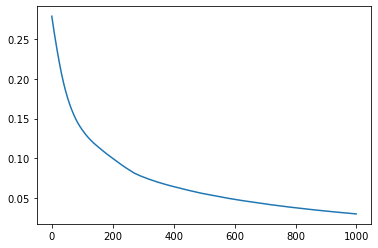

In [10]:
plt.plot(fit_hist.history['loss'])
plt.show()

# 3. AND

In [12]:
# 1. data set
x_and_data = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y_and_data = np.array([[0],[0],[0],[1]] , 'float32')
# 2. 모델 구성
model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation="sigmoid"))
# 3. 모델 학습과정
model.compile(loss="mse", optimizer="adam", metrics=['binary_accuracy'])
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
# 4. 학습
fit_hist = model.fit(x_and_data, y_and_data, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 0s 402ms/step - loss: 0.2506 - binary_accuracy: 0.7500
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2500 - binary_accuracy: 0.7500
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2494 - binary_accuracy: 0.7500
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2488 - binary_accuracy: 0.7500
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2482 - binary_accuracy: 0.7500
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2476 - binary_accuracy: 0.7500
Epoch 7/1000
1/1 [==============================] - 0s 997us/step - loss: 0.2470 - binary_accuracy: 0.7500
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2465 - binary_accuracy: 0.7500
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2459 - binary_accuracy: 0.7500
Epoch 10/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.2048 - binary_accuracy: 1.0000
Epoch 79/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.2041 - binary_accuracy: 1.0000
Epoch 80/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.2035 - binary_accuracy: 1.0000
Epoch 81/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2028 - binary_accuracy: 1.0000
Epoch 82/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2021 - binary_accuracy: 1.0000
Epoch 83/1000
1/1 [==============================] - ETA: 0s - loss: 0.2014 - binary_accuracy: 1.000 - 0s 3ms/step - loss: 0.2014 - binary_accuracy: 1.0000
Epoch 84/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2007 - binary_accuracy: 1.0000
Epoch 85/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.2000 - binary_accuracy: 1.0000
Epoch 86/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1993 - binary_accuracy: 1.0000
Epoch 87/1

1/1 [==============================] - 0s 4ms/step - loss: 0.1456 - binary_accuracy: 1.0000
Epoch 155/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1448 - binary_accuracy: 1.0000
Epoch 156/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1439 - binary_accuracy: 1.0000
Epoch 157/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1431 - binary_accuracy: 1.0000
Epoch 158/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1423 - binary_accuracy: 1.0000
Epoch 159/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.1414 - binary_accuracy: 1.0000
Epoch 160/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.1406 - binary_accuracy: 1.0000
Epoch 161/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1398 - binary_accuracy: 1.0000
Epoch 162/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1390 - binary_accuracy: 1.0000
Epoch 163/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0868 - binary_accuracy: 1.0000
Epoch 230/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0861 - binary_accuracy: 1.0000
Epoch 231/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0854 - binary_accuracy: 1.0000
Epoch 232/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0847 - binary_accuracy: 1.0000
Epoch 233/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0840 - binary_accuracy: 1.0000
Epoch 234/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0834 - binary_accuracy: 1.0000
Epoch 235/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0827 - binary_accuracy: 1.0000
Epoch 236/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0821 - binary_accuracy: 1.0000
Epoch 237/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0814 - binary_accuracy: 1.0000
Epoch 238/1000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.0471 - binary_accuracy: 1.0000
Epoch 306/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0468 - binary_accuracy: 1.0000
Epoch 307/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0464 - binary_accuracy: 1.0000
Epoch 308/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0460 - binary_accuracy: 1.0000
Epoch 309/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0457 - binary_accuracy: 1.0000
Epoch 310/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0453 - binary_accuracy: 1.0000
Epoch 311/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0450 - binary_accuracy: 1.0000
Epoch 312/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0446 - binary_accuracy: 1.0000
Epoch 313/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0443 - binary_accuracy: 1.0000
Epoch 314/1000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.0272 - binary_accuracy: 1.0000
Epoch 381/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0270 - binary_accuracy: 1.0000
Epoch 382/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0268 - binary_accuracy: 1.0000
Epoch 383/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0266 - binary_accuracy: 1.0000
Epoch 384/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0264 - binary_accuracy: 1.0000
Epoch 385/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0263 - binary_accuracy: 1.0000
Epoch 386/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0261 - binary_accuracy: 1.0000
Epoch 387/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0259 - binary_accuracy: 1.0000
Epoch 388/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0257 - binary_accuracy: 1.0000
Epoch 389/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0168 - binary_accuracy: 1.0000
Epoch 456/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0167 - binary_accuracy: 1.0000
Epoch 457/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0167 - binary_accuracy: 1.0000
Epoch 458/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0166 - binary_accuracy: 1.0000
Epoch 459/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0165 - binary_accuracy: 1.0000
Epoch 460/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0164 - binary_accuracy: 1.0000
Epoch 461/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0163 - binary_accuracy: 1.0000
Epoch 462/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0162 - binary_accuracy: 1.0000
Epoch 463/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0161 - binary_accuracy: 1.0000
Epoch 464/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0112 - binary_accuracy: 1.0000
Epoch 532/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0112 - binary_accuracy: 1.0000
Epoch 533/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0111 - binary_accuracy: 1.0000
Epoch 534/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0110 - binary_accuracy: 1.0000
Epoch 535/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0110 - binary_accuracy: 1.0000
Epoch 536/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0109 - binary_accuracy: 1.0000
Epoch 537/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0109 - binary_accuracy: 1.0000
Epoch 538/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 539/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0108 - binary_accuracy: 1.0000
Epoch 540/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 608/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 609/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0079 - binary_accuracy: 1.0000
Epoch 610/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 611/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 612/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0078 - binary_accuracy: 1.0000
Epoch 613/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0077 - binary_accuracy: 1.0000
Epoch 614/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0077 - binary_accuracy: 1.0000
Epoch 615/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0077 - binary_accuracy: 1.0000
Epoch 616/1000
1/1 [==============================] 

1/1 [==============================] - 0s 5ms/step - loss: 0.0059 - binary_accuracy: 1.0000
Epoch 684/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 685/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 686/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 687/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 688/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0058 - binary_accuracy: 1.0000
Epoch 689/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 690/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 691/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0057 - binary_accuracy: 1.0000
Epoch 692/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 760/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 761/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 762/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045 - binary_accuracy: 1.0000
Epoch 763/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0044 - binary_accuracy: 1.0000
Epoch 764/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0044 - binary_accuracy: 1.0000
Epoch 765/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0044 - binary_accuracy: 1.0000
Epoch 766/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0044 - binary_accuracy: 1.0000
Epoch 767/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0044 - binary_accuracy: 1.0000
Epoch 768/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0036 - binary_accuracy: 1.0000
Epoch 836/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 837/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 838/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 839/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 840/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 841/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 842/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 843/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0035 - binary_accuracy: 1.0000
Epoch 844/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 912/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 913/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0029 - binary_accuracy: 1.0000
Epoch 914/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 915/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 916/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 917/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 918/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 919/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0028 - binary_accuracy: 1.0000
Epoch 920/1000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 988/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 989/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0024 - binary_accuracy: 1.0000
Epoch 990/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 991/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 992/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 993/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 994/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 995/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0023 - binary_accuracy: 1.0000
Epoch 996/1000
1/1 [==============================] 

In [ ]:
plt.plot(fit_hist.history['loss'])